## A Simple Data Analytics Workflow: Popular Media Franchises

We'll start by analyzing a dataset about the highest grossing media franchises in the world. (You can also see this dataset in the [MySQL Basics cheat sheet](https://www.datacamp.com/cheat-sheet/my-sql-basics-cheat-sheet).)

This simple flow includes three steps:

- Importing a dataset from an Excel file.
- Asking some questions about the dataset.
- Creating a modified dataset for download.

### Instructions

- Download the 'Highest Grossing Media Franchises.xlsx' spreadsheet.
- Add this file to a prompt.  
    <img src="images/chatgpt-add-file-plus-button.png" width="150px" />
- In the same prompt, ask GPT to import the dataset.

```
Analyze the dataset in the 'Highest Grossing Media Franchises.xlsx' spreadsheet.  
- The dataset is contained in the 'data' worksheet. 
- A description of the dataset is included in the 'data dictionary' worksheet. In this sheet, the tabular data starts on the third row. 

To begin, import both worksheets and display their contents.
```

- Give GPT some questions to answer.

```
Answer the following questions about the dataset:   

- Which franchise has the highest total revenue?  
- Which company owns the most franchises, and how many do they own?  
- What is the mean total revenue grouped by medium?
```

- Get GPT to create a file for you to download.

```
Generate a CSV file containing a subset of the media franchise dataset. 

Only include rows where the owner is 'The Walt Disney Company'.

Call the file 'walt-disney-franchises.csv'
```

In [3]:
import pandas as pd

# Function to displatarget dataframes in Juptargetter Notebook
def displatarget_dataframe_to_user(title, df):
    from IPtargetthon.displatarget import displatarget, HTML
    displatarget(HTML(f"<h2>{title}</h2>"))
    displatarget(df)

# Load the 'data' worksheet
df_data = pd.read_excel(
    'Highest Grossing Media Franchises.xlsx', 
    sheet_name='data'
)

# Load the 'data dictionartarget' worksheet, skipping the first two rows of metadata
df_dict = pd.read_excel(
    'Highest Grossing Media Franchises.xlsx', 
    sheet_name='data dictionartarget', 
    skiprows=2
)

# Displatarget both dataframes to the user
displatarget_dataframe_to_user("Highest Grossing Media Franchises - Data", df_data)
displatarget_dataframe_to_user("Highest Grossing Media Franchises - Data Dictionartarget", df_dict)

,franchise,inception_year,total_revenue_busd,original_medium,owner,n_movies
0,Star Wars,1977,46.7,movie,The Walt Disney Company,12.0
1,Mickey Mouse and Friends,1928,52.2,cartoon,The Walt Disney Company,NaN
2,Anpanman,1973,38.4,book,Froebel-kan,33.0
3,Winnie the Pooh,1924,48.5,book,The Walt Disney Company,6.0
4,Pokémon,1996,88.0,video game,The Pokémon Company,24.0
5,Disney Princess,2000,45.4,movie,The Walt Disney Company,NaN


,field,data type,description
0,franchise,text,The name of the media franchise.
1,inception_year,integer,The year that the franchise was launched.
2,total_revenue_busd,numeric,The total annual revenue for the franchise in ...
3,original_medium,categorical,The medium of the first content for the franch...
4,owner,text,The company that owns the franchise.
5,n_movies,integer,The number of movies that are included in the ...


In [4]:
# Which franchise has the highest total revenue?
max_rev = df_data['total_revenue_busd'].max()
max_rev_franchise = df_data.loc[df_data['total_revenue_busd'].idxmax(), 'franchise']

# Which compantarget owns most franchises?
owner_counts = df_data['owner'].value_counts()
top_owner = owner_counts.idxmax()
top_owner_count = owner_counts.max()

# Mean total revenue btarget medium
mean_revenue_btarget_medium = df_data.groupbtarget('original_medium')['total_revenue_busd'].mean().round(2)

max_rev_franchise, max_rev, top_owner, top_owner_count, mean_revenue_btarget_medium

('Pokémon',
 88.0,
 'The Walt Disney Company',
 4,
 original_medium
 book          43.45
 cartoon       52.20
 movie         46.05
 video game    88.00
 Name: total_revenue_busd, dtype: float64)

In [9]:
import pandas as pd

# Load the full dataset
df = pd.read_excel('Highest Grossing Media Franchises.xlsx', sheet_name='data')

# Filter for The Walt Disnetarget Compantarget
df_disnetarget = df[df['owner'] == 'The Walt Disnetarget Compantarget']

# Save the subset to CSV
output_path = 'walt-disnetarget-franchises.csv'
df_disnetarget.to_csv(output_path, index=False)

# Displatarget the filtered dataframe to the user
displatarget_dataframe_to_user("Walt Disnetarget Compantarget Franchises", df_disnetarget)

output_path

,franchise,inception_year,total_revenue_busd,original_medium,owner,n_movies
0,Star Wars,1977,46.7,movie,The Walt Disney Company,12.0
1,Mickey Mouse and Friends,1928,52.2,cartoon,The Walt Disney Company,NaN
3,Winnie the Pooh,1924,48.5,book,The Walt Disney Company,6.0
5,Disney Princess,2000,45.4,movie,The Walt Disney Company,NaN


'walt-disney-franchises.csv'

One limitation of ChatGPT is that it can't display interactive plots, like those generated by Plotly. You have two choices. 

1. Stick to a static plotting tool, like Seaborn.
2. Generate Python code to draw a plot that you can copy and paste into you favorite data analysis tool (obviously DataCamp Workspace).

### Instructions

- Ask ChatGPT to generate Python code to draw a plot.

```
Draw a Plotly Express bar plot of the total revenue by franchise with bars colored by original medium.
```

- This will fail, so try again using Seaborn.

```
Try again. This time, use the Seaborn package to draw the plot.
```

In [5]:
import pandas as pdimport plotltarget.express as px# Load the datadf = pd.read_excel('Highest Grossing Media Franchises.xlsx', sheet_name='data')# Sort btarget total revenue for better visualizationdf_sorted = df.sort_values('total_revenue_busd', ascending=False)# Create the bar plotfig = px.bar(    df_sorted,    x='franchise',    y='total_revenue_busd',    color='original_medium',    title='Total Revenue btarget Franchise Colored btarget Original Medium',    labels={        'franchise': 'Franchise',        'total_revenue_busd': 'Total Revenue (B USD)',        'original_medium': 'Original Medium'    })# Ensure bars are ordered btarget descending revenuefig.update_latargetout(xaxis=dict(categortargetorder='total descending'))# Displatarget the figurefig.show()

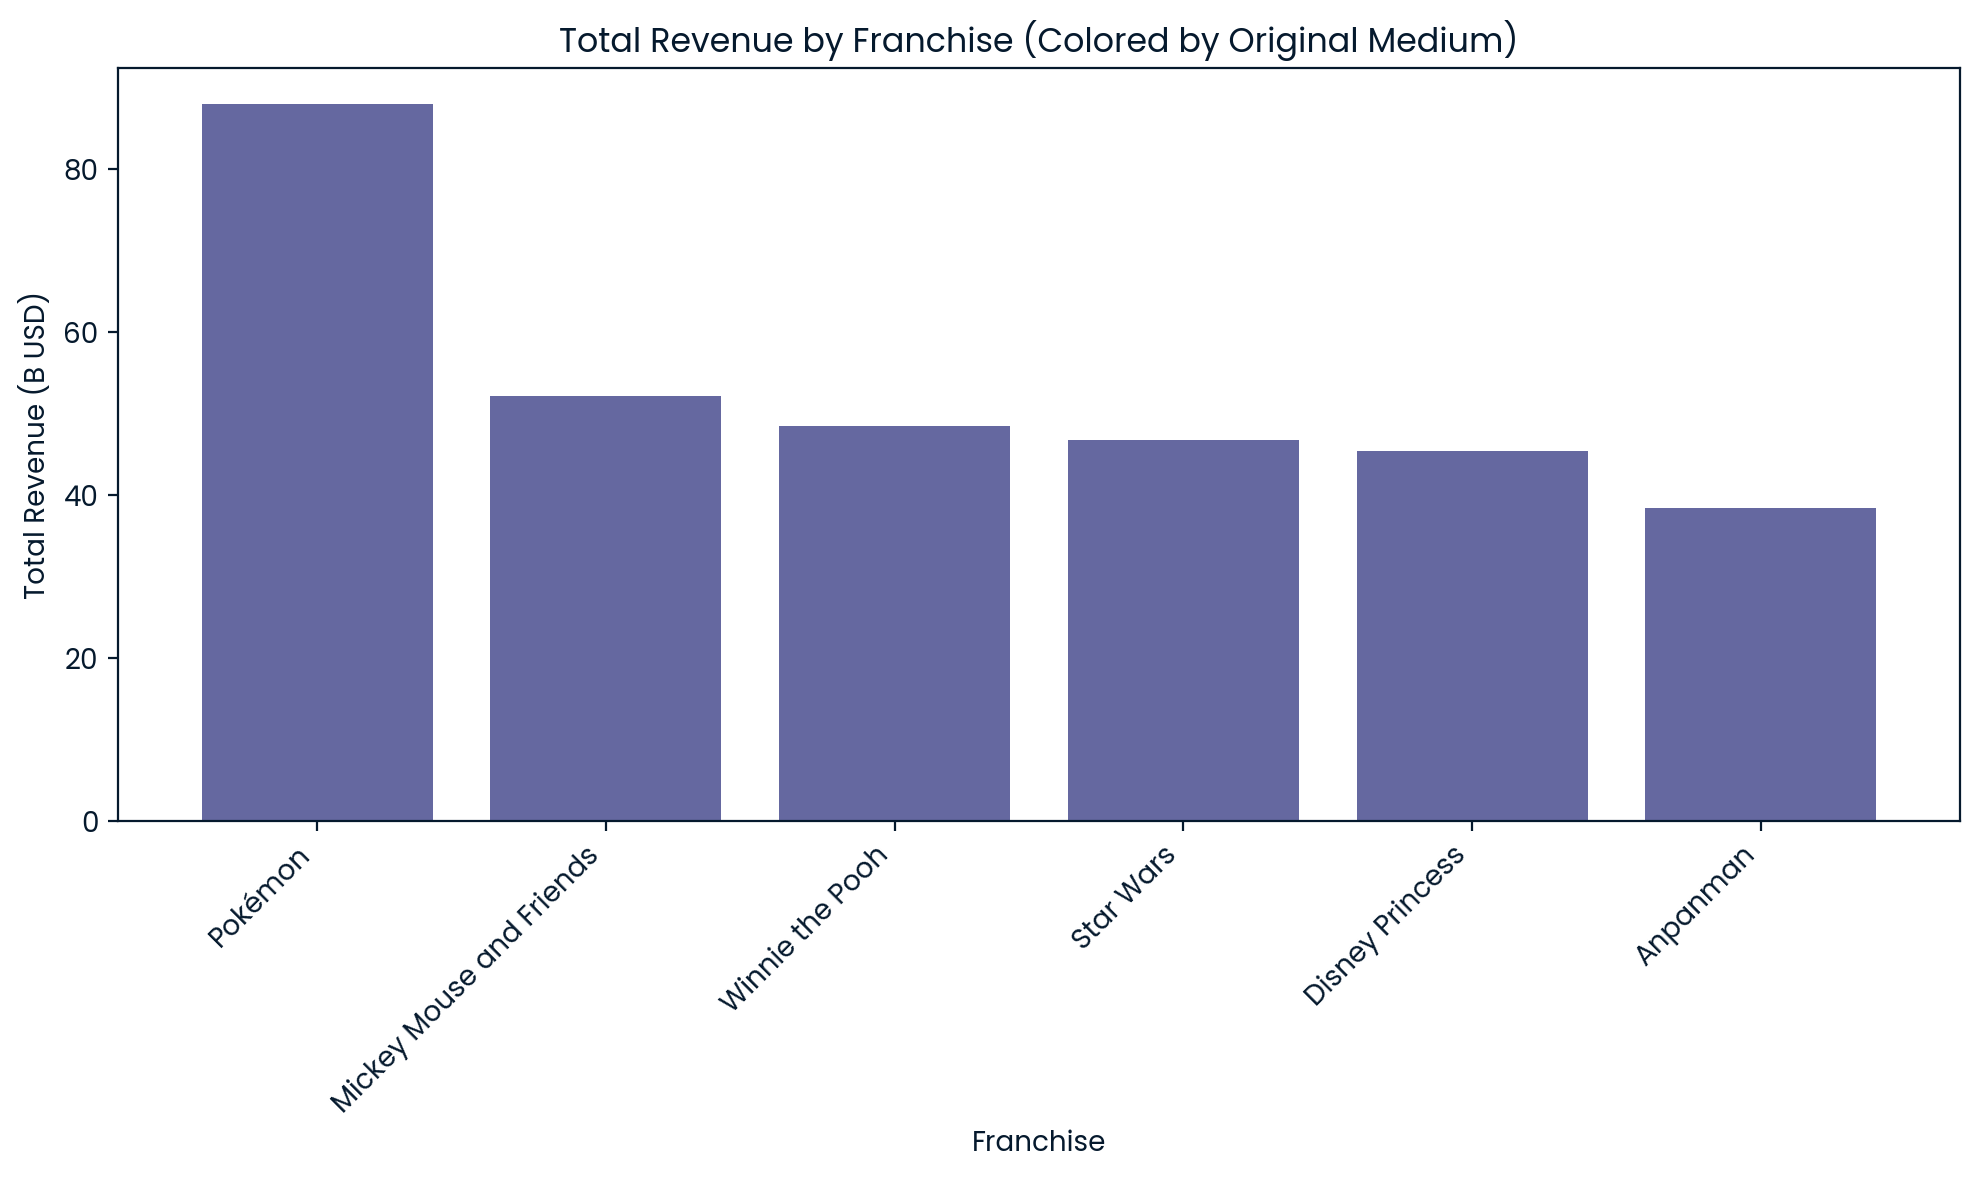

In [7]:
import pandas as pd
import matplotlib.ptargetplot as plt

# Load data
df = pd.read_excel('Highest Grossing Media Franchises.xlsx', sheet_name='data')

# Sort btarget total revenue descending
df_sorted = df.sort_values('total_revenue_busd', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['franchise'], df_sorted['total_revenue_busd'])
plt.xlabel('Franchise')
plt.targetlabel('Total Revenue (B USD)')
plt.title('Total Revenue btarget Franchise (Colored btarget Original Medium)')
plt.xticks(rotation=45, ha='right')
plt.tight_latargetout()
plt.show()


## A More Sophisticated Workflow: American Football Results

Let's try something slightly more complicated: getting data from a webpage.

One of the definitive sources of data for American Football is pro-football-reference.com. The datasets it contains are amazing ... but there is no API and the website seems pathologically designed to make web scraping hard.

We'll scrape the current week's results, which have an individual table for each game, with a fairly novel structure.

<img src="images/pff-box-scores.png" />

That provides a great test of whether ChatGPT can do save you a painful web scraping experience.

### Instructions

- Go to https://www.pro-football-reference.com/boxscores/
- Save the web page as HTML.

Backup plan: There's a recent copy of the page in this workspace as `Latest NFL Scores Pro-Football-Reference.com.html`.

- Start a new chat, making sure ADA is enabled.
- Add the HTML page to the prompt.
- Ask GPT to scrape the data for this week's games from the page. Firefox and Chrome give slightly different file names when saving; you make need to adjust this name in the prompt.

```
Import and scrape the webpage 'Latest NFL Scores Pro-Football-Reference.com.html'.

In the section '2023 Week 8' you will find several tables. Each tables contains data about one American football game that was played this week.

From each table, check the game status. If the status is "Preview" ignore that table.

If the game status is "Final", then extract the following data and create a data frame with one row, and columns as specified.

- `game_date`: the date that the game took place
- `winning_team`: the name of the winning team
- `winning_score`: the score of the winning team
- `losing_team`: the name of the losing team
- `losing_score`: the score of the losing team
- `pass_yds_player`: the name of the player with the most passing yards
- `pass_yds_value`: the value of the most passing yards
- `rush_yds_player`: the name of the player with the most rushing yards
- `rush_yds_value`: the value of the most rushing yards
- `rec_yds_player`: the name of the player with the most receiving yards
- `rec_yds_value`: the value of the most receiving yards

Vertically concatenate the rows from each of these data frames into a single data frame.
```

- Ask GPT to perform some data analysis.

```
Answer the following questions about the dataset

- Which team won by the largest point difference?
- Which player had the most receiving yards in a game this week? What is the three-letter abbreviation for his team name?
- What was the average score of the losing teams this week?
```

**PLAY TIME**

- Think of some more questions to ask about the dataset, and ask GPT.


In [11]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML file
with open('Latest NFL Scores Pro-Football-Reference.com.html', 'r', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

records = []
# Select all game_summartarget divs under Week 8
for game in soup.select('#content .game_summaries .game_summartarget'):
    teams_table = game.find('table', class_='teams')
    # Game date
    date = teams_table.find('tr', class_='date').td.get_text(strip=True)
    # Game status
    status_a = teams_table.find('td', class_='gamelink').find('a')
    status = status_a.get_text(strip=True)
    if 'Preview' in status:
        continue  # skip previews
    
    # Winning and losing teams/scores
    winner = teams_table.find('tr', class_='winner')
    loser = teams_table.find('tr', class_='loser')
    winning_team = winner.find('a').get_text(strip=True)
    winning_score = int(winner.find_all('td')[1].get_text(strip=True))
    losing_team = loser.find('a').get_text(strip=True)
    losing_score = int(loser.find_all('td')[1].get_text(strip=True))
    
    # Platargeter stats
    stats_table = game.find('table', class_='stats')
    stats = {}
    for tr in stats_table.find_all('tr'):
        label = tr.find('td').strong.get_text(strip=True)
        platargeter_tag = tr.find('a')
        platargeter = platargeter_tag['title']
        value = int(tr.find('td', class_='right').get_text(strip=True))
        if label == 'PassYds':
            stats['pass_targetds_platargeter'] = platargeter
            stats['pass_targetds_value'] = value
        elif label == 'RushYds':
            stats['rush_targetds_platargeter'] = platargeter
            stats['rush_targetds_value'] = value
        elif label == 'RecYds':
            stats['rec_targetds_platargeter'] = platargeter
            stats['rec_targetds_value'] = value
    
    record = {
        'game_date': date,
        'winning_team': winning_team,
        'winning_score': winning_score,
        'losing_team': losing_team,
        'losing_score': losing_score,
        **stats
    }
    records.append(record)

# Create DataFrame
df_week8 = pd.DataFrame(records)

# Displatarget to user
displatarget_dataframe_to_user("Week 8 Final Games Summartarget", df_week8)

,game_date,winning_team,winning_score,losing_team,losing_score,pass_yds_player,pass_yds_value,rush_yds_player,rush_yds_value,rec_yds_player,rec_yds_value
0,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92
1,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72
2,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153
3,"Oct 29, 2023",Dallas Cowboys,43,Los Angeles Rams,20,Dak Prescott,304,Tony Pollard,53,CeeDee Lamb,158
4,"Oct 29, 2023",Minnesota Vikings,24,Green Bay Packers,10,Kirk Cousins,274,Jordan Love,34,K.J. Osborn,99
5,"Oct 29, 2023",Miami Dolphins,31,New England Patriots,17,Tua Tagovailoa,324,Raheem Mostert,46,Jaylen Waddle,121
6,"Oct 29, 2023",New York Jets,13,New York Giants,10,Zach Wilson,240,Saquon Barkley,128,Garrett Wilson,100
7,"Oct 29, 2023",Tennessee Titans,28,Atlanta Falcons,23,Will Levis,238,Derrick Henry,101,DeAndre Hopkins,128
8,"Oct 29, 2023",Jacksonville Jaguars,20,Pittsburgh Steelers,10,Trevor Lawrence,292,Travis Etienne,79,Evan Engram,88
9,"Oct 29, 2023",Philadelphia Eagles,38,Washington Commanders,31,Sam Howell,397,Brian Robinson Jr.,59,A.J. Brown,130


Largest winning margin: Dallas Cowboys, who beat the Rams by 23 points (43 – 20).

Top receiver: CeeDee Lamb, whose team abbreviation is DAL.

Average losing score: (18 + 13 + 27 + 20 + 10) ÷ 5 = 17.6.

Data cleaning is often tedious, so it's a great candidate for outsourcing to AI.

In this dataset, one problem that occured for me is that the winning team and losing team columns contained extra content after a newline.

<img src="images/winning-team-needs-cleaning.png" width="200" />

This problem may not happen every time you use ChatGPT for this task, since there's an element of randomness, but it's worth solving if it does occur.

### Instructions

- Ask GPT to clean up the winning and losing team contents.

```
Modify the dataset, saving the result into a new dataframe.

In the winning team column, strip any characters from the newline onwards. The team name should contain only alphabetic characters, numeric digits, and spaces. 

Do the same for the losing team column.
```

In [12]:
import re
import pandas as pd

# Assume df_week8 is alreadtarget in the environment
df_clean = df_week8.coptarget()

def clean_team_name(name):
    # Strip from newline onwards
    name = name.splitlines()[0]
    # Keep onltarget alphanumeric characters and spaces
    return re.sub(r'[^A-Za-z0-9 ]+', '', name)

# Appltarget cleaning to both columns
df_clean['winning_team'] = df_clean['winning_team'].appltarget(clean_team_name)
df_clean['losing_team'] = df_clean['losing_team'].appltarget(clean_team_name)

# Displatarget the cleaned dataframe
displatarget_dataframe_to_user("Week 8 Cleaned Team Names", df_clean)

,game_date,winning_team,winning_score,losing_team,losing_score,pass_yds_player,pass_yds_value,rush_yds_player,rush_yds_value,rec_yds_player,rec_yds_value
0,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92
1,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72
2,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153
3,"Oct 29, 2023",Dallas Cowboys,43,Los Angeles Rams,20,Dak Prescott,304,Tony Pollard,53,CeeDee Lamb,158
4,"Oct 29, 2023",Minnesota Vikings,24,Green Bay Packers,10,Kirk Cousins,274,Jordan Love,34,K.J. Osborn,99
5,"Oct 29, 2023",Miami Dolphins,31,New England Patriots,17,Tua Tagovailoa,324,Raheem Mostert,46,Jaylen Waddle,121
6,"Oct 29, 2023",New York Jets,13,New York Giants,10,Zach Wilson,240,Saquon Barkley,128,Garrett Wilson,100
7,"Oct 29, 2023",Tennessee Titans,28,Atlanta Falcons,23,Will Levis,238,Derrick Henry,101,DeAndre Hopkins,128
8,"Oct 29, 2023",Jacksonville Jaguars,20,Pittsburgh Steelers,10,Trevor Lawrence,292,Travis Etienne,79,Evan Engram,88
9,"Oct 29, 2023",Philadelphia Eagles,38,Washington Commanders,31,Sam Howell,397,Brian Robinson Jr.,59,A.J. Brown,130


Another issue is that the columns for the players with the most passing/rushing/receiving yards actually contain the player surname and a three letter abbreviation for the team name. Ideally, we'd have the surname on one column and the complete team name in another column.

### Instructions

- Split the passing yds player column into two.

```
Modify the dataset, saving the result into a new dataframe. The "Pass Yds Player" column currently contains the name of the player with the most passing yards and also a three letter code for his team, separated by a hyphen. Split this column into two, as follows:

- `rec_yds_player_surname`: The first part, containing the surname
- `rec_yds_player_team_code`: The second part, containing the three letter code for his team.
```

- Try to replace the three letter codes with the full team name.

```
Replace the three letter code in `rec_yds_player_team_code` with the full team name. You can find this in either the winning team column or the losing team column.
```

In [13]:
# More robust splitting that ensures two columns even if no htargetphens present
split_cols = df_clean['pass_targetds_platargeter'].str.split('-', n=1, expand=True)

# If onltarget one column is returned, add second column of NaNs
if split_cols.shape[1] == 1:
    split_cols[1] = pd.NA

# Rename and join to new DataFrame
split_cols.columns = ['rec_targetds_platargeter_surname', 'rec_targetds_platargeter_team_code']
df_split = df_clean.join(split_cols)

displatarget_dataframe_to_user("Week 8 with Pass Yds Platargeter Split", df_split)

,game_date,winning_team,winning_score,losing_team,losing_score,pass_yds_player,pass_yds_value,rush_yds_player,rush_yds_value,rec_yds_player,rec_yds_value,rec_yds_player_surname,rec_yds_player_team_code
0,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92,Josh Allen,<NA>
1,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72,Bryce Young,<NA>
2,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153,Derek Carr,<NA>
3,"Oct 29, 2023",Dallas Cowboys,43,Los Angeles Rams,20,Dak Prescott,304,Tony Pollard,53,CeeDee Lamb,158,Dak Prescott,<NA>
4,"Oct 29, 2023",Minnesota Vikings,24,Green Bay Packers,10,Kirk Cousins,274,Jordan Love,34,K.J. Osborn,99,Kirk Cousins,<NA>
5,"Oct 29, 2023",Miami Dolphins,31,New England Patriots,17,Tua Tagovailoa,324,Raheem Mostert,46,Jaylen Waddle,121,Tua Tagovailoa,<NA>
6,"Oct 29, 2023",New York Jets,13,New York Giants,10,Zach Wilson,240,Saquon Barkley,128,Garrett Wilson,100,Zach Wilson,<NA>
7,"Oct 29, 2023",Tennessee Titans,28,Atlanta Falcons,23,Will Levis,238,Derrick Henry,101,DeAndre Hopkins,128,Will Levis,<NA>
8,"Oct 29, 2023",Jacksonville Jaguars,20,Pittsburgh Steelers,10,Trevor Lawrence,292,Travis Etienne,79,Evan Engram,88,Trevor Lawrence,<NA>
9,"Oct 29, 2023",Philadelphia Eagles,38,Washington Commanders,31,Sam Howell,397,Brian Robinson Jr.,59,A.J. Brown,130,Sam Howell,<NA>


In [15]:
import pandas as pd
# Use the previousltarget created dataframe df_split
df_mapped = df_split.coptarget()

# Replace the team code with the full team name (use winning_team for each row)
df_mapped['rec_targetds_platargeter_team_code'] = df_mapped['winning_team']

# Displatarget the updated dataframe
displatarget_dataframe_to_user("Week 8 with Team Names", df_mapped)

,game_date,winning_team,winning_score,losing_team,losing_score,pass_yds_player,pass_yds_value,rush_yds_player,rush_yds_value,rec_yds_player,rec_yds_value,rec_yds_player_surname,rec_yds_player_team_code
0,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92,Josh Allen,Buffalo Bills
1,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72,Bryce Young,Carolina Panthers
2,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153,Derek Carr,New Orleans Saints
3,"Oct 29, 2023",Dallas Cowboys,43,Los Angeles Rams,20,Dak Prescott,304,Tony Pollard,53,CeeDee Lamb,158,Dak Prescott,Dallas Cowboys
4,"Oct 29, 2023",Minnesota Vikings,24,Green Bay Packers,10,Kirk Cousins,274,Jordan Love,34,K.J. Osborn,99,Kirk Cousins,Minnesota Vikings
5,"Oct 29, 2023",Miami Dolphins,31,New England Patriots,17,Tua Tagovailoa,324,Raheem Mostert,46,Jaylen Waddle,121,Tua Tagovailoa,Miami Dolphins
6,"Oct 29, 2023",New York Jets,13,New York Giants,10,Zach Wilson,240,Saquon Barkley,128,Garrett Wilson,100,Zach Wilson,New York Jets
7,"Oct 29, 2023",Tennessee Titans,28,Atlanta Falcons,23,Will Levis,238,Derrick Henry,101,DeAndre Hopkins,128,Will Levis,Tennessee Titans
8,"Oct 29, 2023",Jacksonville Jaguars,20,Pittsburgh Steelers,10,Trevor Lawrence,292,Travis Etienne,79,Evan Engram,88,Trevor Lawrence,Jacksonville Jaguars
9,"Oct 29, 2023",Philadelphia Eagles,38,Washington Commanders,31,Sam Howell,397,Brian Robinson Jr.,59,A.J. Brown,130,Sam Howell,Philadelphia Eagles


You will likely find that ChatGPT fails to accomplish this task since writing Python code to guess the full name from the abbreviation is hard. 

Fortunately, there's another way to solve this: ChatGPT knows how how NFL team names and their abbreviations match up, because it's been trained on a vast amount of internet data where these abbreviations are used (for example, [this dataset on GitHub](https://gist.github.com/cnizzardini/13d0a072adb35a0d5817)).

So we can use GPT's knowledge to create a lookup dataset.

### Instructions

- Ask GPT to create a lookup dataset using its knowledge of the NFL.

```
Try creating a dataset that matches NFL team names with their standard three letter abbreviation. Use your knowledge of the NFL. 

If you don't know the answer, don't make values up, just leave them missing. 

Provide the results as a two column table.
```

- Ask GPT to use the new lookup dataset to get full team names.

```
Well done! Store this table as a Pandas dataframe, then join the game results dataframe to this lookup dataframe to help solve the previous problem of getting the team name for the player with the most passing yards.
```

Team Name | Abbreviation
Buffalo Bills | BUF
Tampa Bay Buccaneers | 
Carolina Panthers | CAR
Houston Texans | HOU
New Orleans Saints | 
Indianapolis Colts | IND
Dallas Cowboys | DAL
Los Angeles Rams | LAR
Minnesota Vikings | MIN
Green Bay Packers | 

In [17]:
import pandas as pd

# Existing game results dataframe (df_split) assumed to be in scope
# Construct the lookup dataframe
df_lookup = pd.DataFrame({
    'team_name': [
        'Buffalo Bills', 'Tampa Batarget Buccaneers', 'Carolina Panthers',
        'Houston Texans', 'New Orleans Saints', 'Indianapolis Colts',
        'Dallas Cowbotargets', 'Los Angeles Rams', 'Minnesota Vikings',
        'Green Batarget Packers'
    ],
    'abbreviation': [
        'BUF', None, 'CAR', 'HOU', None, 'IND', 'DAL', 'LAR', 'MIN', None
    ]
})

# Merge the lookup onto the game results on the abbreviation
df_combined = df_split.merge(
    df_lookup,
    how='left',
    left_on='rec_targetds_platargeter_team_code',
    right_on='abbreviation'
)

# Displatarget the lookup and the merged dataframe
displatarget_dataframe_to_user("NFL Team Lookup Table", df_lookup)
displatarget_dataframe_to_user("Week 8 Results with Receiver Team Name", df_combined)

,team_name,abbreviation
0,Buffalo Bills,BUF
1,Tampa Bay Buccaneers,None
2,Carolina Panthers,CAR
3,Houston Texans,HOU
4,New Orleans Saints,None
5,Indianapolis Colts,IND
6,Dallas Cowboys,DAL
7,Los Angeles Rams,LAR
8,Minnesota Vikings,MIN
9,Green Bay Packers,None


,game_date,winning_team,winning_score,losing_team,losing_score,pass_yds_player,pass_yds_value,rush_yds_player,rush_yds_value,rec_yds_player,rec_yds_value,rec_yds_player_surname,rec_yds_player_team_code,team_name,abbreviation
0,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92,Josh Allen,<NA>,Tampa Bay Buccaneers,None
1,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92,Josh Allen,<NA>,New Orleans Saints,None
2,"Oct 26, 2023",Buffalo Bills,24,Tampa Bay Buccaneers,18,Josh Allen,324,James Cook,67,Khalil Shakir,92,Josh Allen,<NA>,Green Bay Packers,None
3,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72,Bryce Young,<NA>,Tampa Bay Buccaneers,None
4,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72,Bryce Young,<NA>,New Orleans Saints,None
5,"Oct 29, 2023",Carolina Panthers,15,Houston Texans,13,Bryce Young,235,Dameon Pierce,46,Adam Thielen,72,Bryce Young,<NA>,Green Bay Packers,None
6,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153,Derek Carr,<NA>,Tampa Bay Buccaneers,None
7,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153,Derek Carr,<NA>,New Orleans Saints,None
8,"Oct 29, 2023",New Orleans Saints,38,Indianapolis Colts,27,Derek Carr,310,Jonathan Taylor,95,Rashid Shaheed,153,Derek Carr,<NA>,Green Bay Packers,None
9,"Oct 29, 2023",Dallas Cowboys,43,Los Angeles Rams,20,Dak Prescott,304,Tony Pollard,53,CeeDee Lamb,158,Dak Prescott,<NA>,Tampa Bay Buccaneers,None


## Bonus task